In [ ]:
!pip install datasets
!pip install datasets matplotlib pillow
!pip install torch torchvision
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-non

In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms

# <b>1 <span style='color:#0386f7de'>|</span> Uploading the dataset </b>

https://huggingface.co/datasets/keremberke/chest-xray-classification/viewer/full/train?f%5Blabels%5D%5Bvalue%5D=0

In [ ]:
ds = load_dataset("keremberke/chest-xray-classification", name="full")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/4077 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1165 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/582 [00:00<?, ? examples/s]

# <b>2 <span style='color:#0386f7de'>|</span> Data Visualization </b>

In [ ]:
def show_image(dataset, index):
    # The image is already a PIL image object
    image = dataset['image'][index]

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()


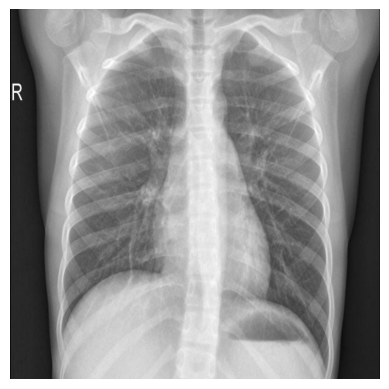

In [ ]:
show_image(ds['train'], 0)

In [ ]:
def show_images_and_histograms(dataset, start_index, num_images):
    # Define the number of columns for subplot (2 per image: one for the image, one for the histogram)
    num_columns = 2
    num_rows = num_images

    # Set up the figure size
    plt.figure(figsize=(10, 5 * num_images))

    for i in range(num_images):
        # Calculate the current index
        current_index = start_index + i

        # Get the image
        image = dataset['image'][current_index]

        # Convert PIL Image to NumPy array for histogram
        image_array = np.array(image)

        # Plot the image
        plt.subplot(num_rows, num_columns, i * num_columns + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(f'Image {current_index}')

        # Plot the histogram
        plt.subplot(num_rows, num_columns, i * num_columns + 2)
        plt.hist(image_array.ravel(), bins=128, color='gray', alpha=0.8)
        plt.title('Pixel Intensity Histogram')
        plt.xlabel('Pixel intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



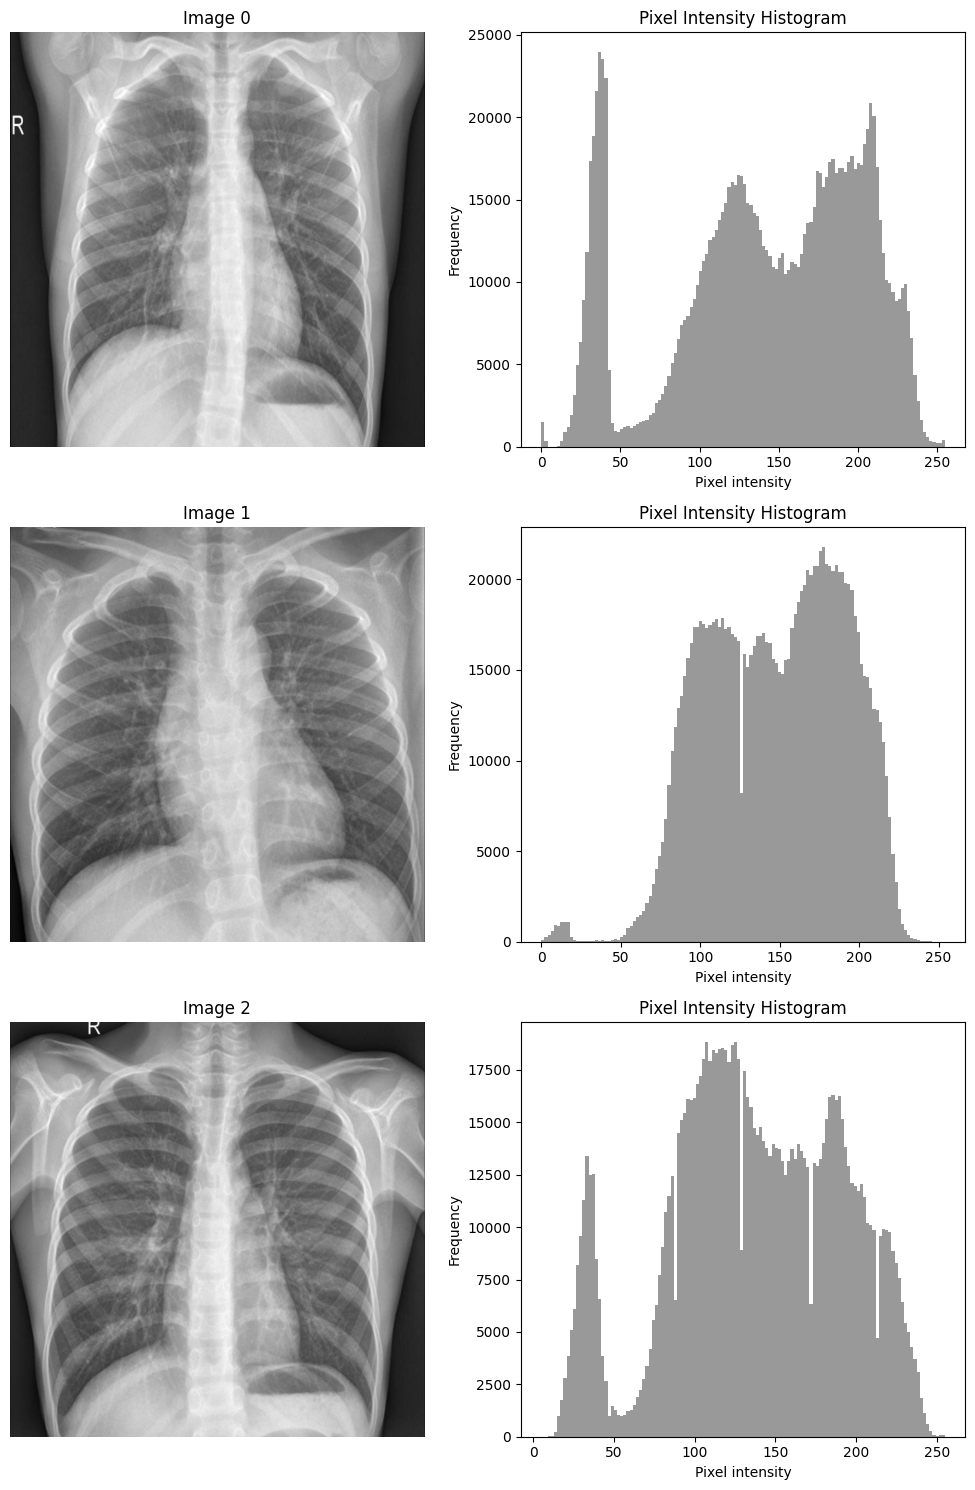

In [ ]:
show_images_and_histograms(ds['train'], 0, 3)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

def interactive_image_viewer(dataset):
    # Create a slider
    slider = widgets.IntSlider(value=0, min=0, max=len(dataset['image']) - 1, step=1, description='Index')

    # Function to update the image based on the slider
    def update_image(change):
        index = change['new']
        image = dataset['image'][index]

        # Clear current output
        with output:
            plt.figure(figsize=(6, 4))
            plt.imshow(np.array(image), cmap='gray')
            plt.axis('off')  # Hide axes
            plt.title(f'Image at Index: {index}')
            plt.show()

    # Observe changes in the slider value
    slider.observe(update_image, names='value')

    # Display the slider and the image
    display(slider)

    # Initial output area for displaying images
    output = widgets.Output()
    display(output)

    # Initialize with the first image
    slider.value = 0  # Triggering the observe function manually by resetting the slider value


In [ ]:
interactive_image_viewer(ds['train'])

IntSlider(value=0, description='Index', max=4076)

Output()

In [ ]:
def show_images_with_targets(dataset, start_index, num_images):
    plt.figure(figsize=(15, 3 * num_images))
    for i in range(num_images):
        ax = plt.subplot(num_images, 1, i + 1)
        image = np.array(dataset['image'][start_index + i])
        target = dataset['labels'][start_index + i]  # Adjust this if your target key is different

        plt.imshow(image, cmap='gray')
        plt.title(f'Target: {target}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


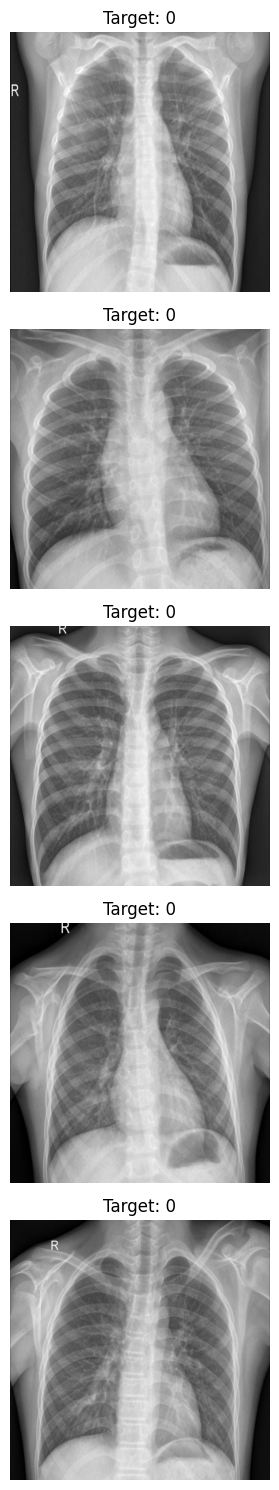

In [ ]:
show_images_with_targets(ds['train'], 0, 5)

# <b>3 <span style='color:#0386f7de'>|</span> Data Augmentation</b>

In [ ]:
# Define a transform pipeline
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # Flip the image horizontally with a probability of 0.5
    transforms.RandomRotation(45),           # Rotate the image by up to 30 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)  # Randomly change brightness, contrast, saturation and hue
])


In [ ]:
def show_augmented_images(dataset, start_index, num_images, transform):
    # Set up the figure size
    plt.figure(figsize=(10, 2 * num_images))

    for i in range(num_images):
        # Calculate the current index
        current_index = start_index + i

        # Get the image and apply transformation
        original_image = dataset['image'][current_index]
        augmented_image = transform(original_image)

        # Plot the original image
        plt.subplot(num_images, 2, 2 * i + 1)
        plt.imshow(np.array(original_image), cmap='gray')
        plt.axis('off')
        plt.title(f'Original Image {current_index}')

        # Plot the augmented image
        plt.subplot(num_images, 2, 2 * i + 2)
        plt.imshow(np.array(augmented_image), cmap='gray')
        plt.axis('off')
        plt.title(f'Augmented Image {current_index}')

    plt.tight_layout()
    plt.show()


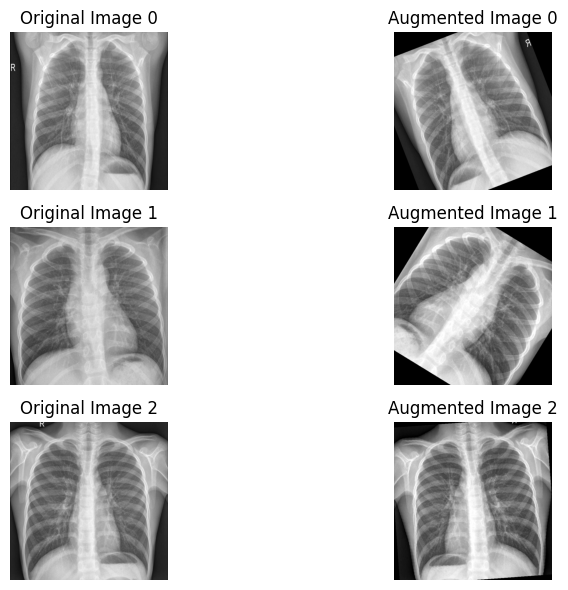

In [ ]:
show_augmented_images(ds['train'], 0, 3, transform)

In [ ]:
# List of transformations
transformations = {
    'Horizontal Flip': transforms.RandomHorizontalFlip(p=1),  # Always apply horizontal flip
    'Rotation 30°': transforms.RandomRotation(30),  # Rotate by up to 30 degrees
    'Vertical Flip': transforms.RandomVerticalFlip(p=1),  # Always apply vertical flip
    'Color Jitter': transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1)  # Randomly change brightness, contrast, saturation, and hue
}


In [ ]:
def show_single_image_augmentations(dataset, index, transformations):
    # Get the original image
    original_image = dataset['image'][index]

    # Set up the figure size
    num_transforms = len(transformations)
    plt.figure(figsize=(2 * (num_transforms + 1), 4))  # Adjust figure size appropriately

    # Display the original image
    plt.subplot(1, num_transforms + 1, 1)
    plt.imshow(np.array(original_image), cmap='gray')
    plt.axis('off')
    plt.title('Original Image')

    # Apply and display each transformation
    for i, (key, transform) in enumerate(transformations.items(), start=2):
        augmented_image = transform(original_image)
        plt.subplot(1, num_transforms + 1, i)
        plt.imshow(np.array(augmented_image), cmap='gray')
        plt.axis('off')
        plt.title(key)

    plt.tight_layout()
    plt.show()


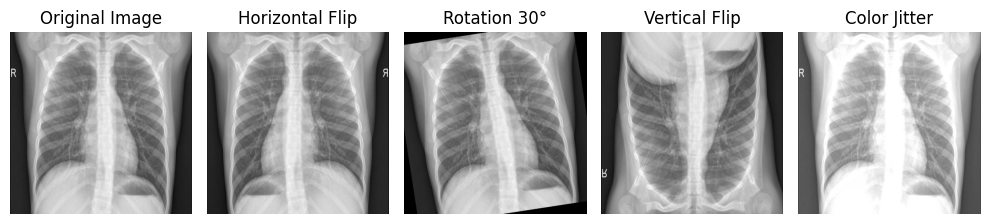

In [ ]:
show_single_image_augmentations(ds['train'], 0, transformations)